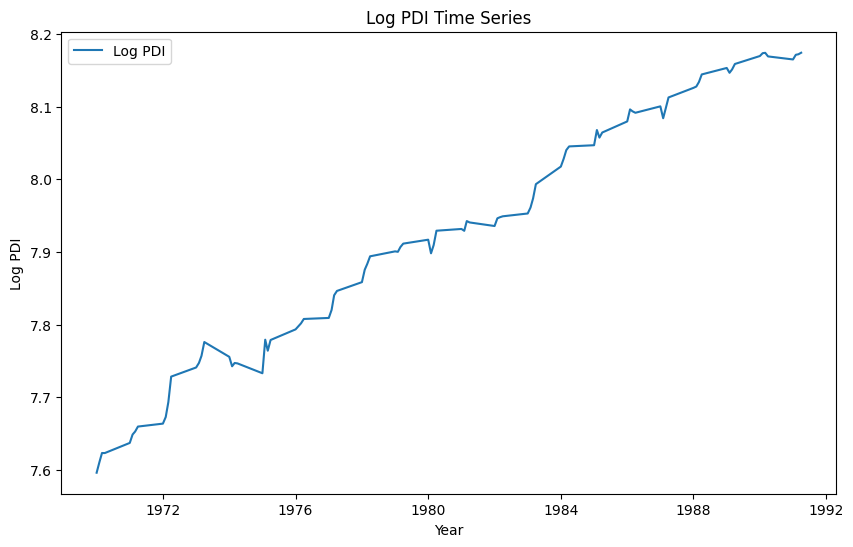

ADF Test on Log PDI
ADF Statistic: -1.4407471034265025
p-value: 0.5625931773883976
Critical Values: {'1%': -3.512738056978279, '5%': -2.8974898650628984, '10%': -2.585948732897085}
Non-Stationary


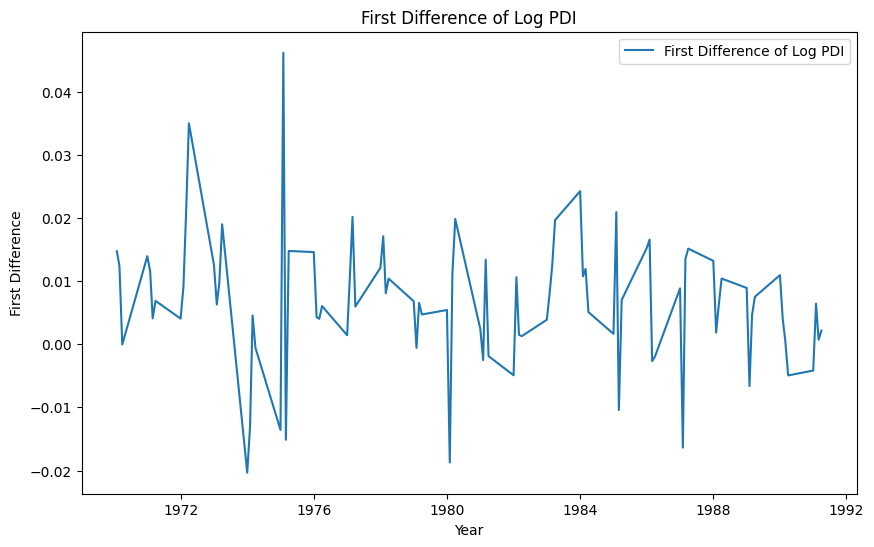

ADF Test on First Difference of Log PDI
ADF Statistic: -4.66915965544451
p-value: 9.612498486181354e-05
Critical Values: {'1%': -3.512738056978279, '5%': -2.8974898650628984, '10%': -2.585948732897085}
Stationary


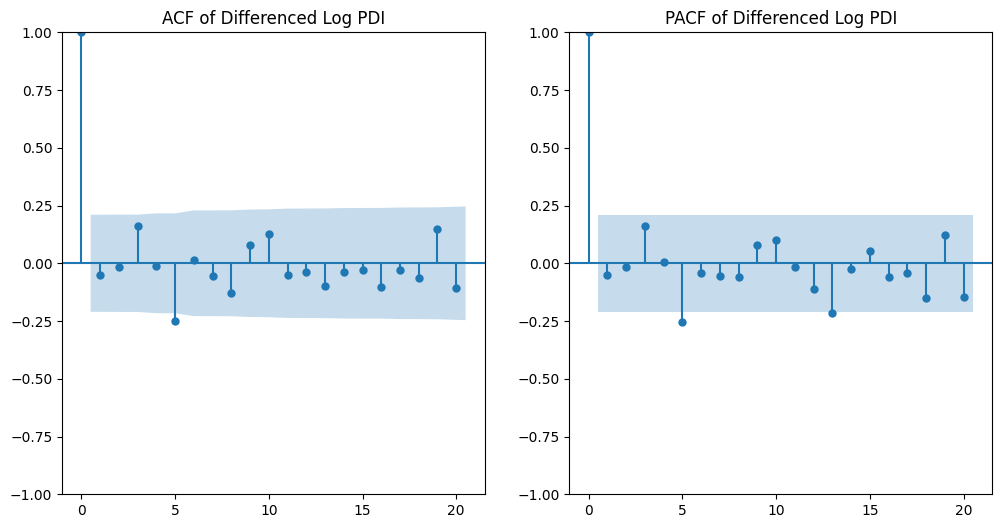

                               SARIMAX Results                                
Dep. Variable:                log_PDI   No. Observations:                   88
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 260.182
Date:                Fri, 14 Mar 2025   AIC                           -516.364
Time:                        18:00:16   BIC                           -511.433
Sample:                             0   HQIC                          -514.379
                                 - 88                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1860      0.079      2.347      0.019       0.031       0.341
sigma2         0.0001   1.71e-05      8.650      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   4.64   Jarque-

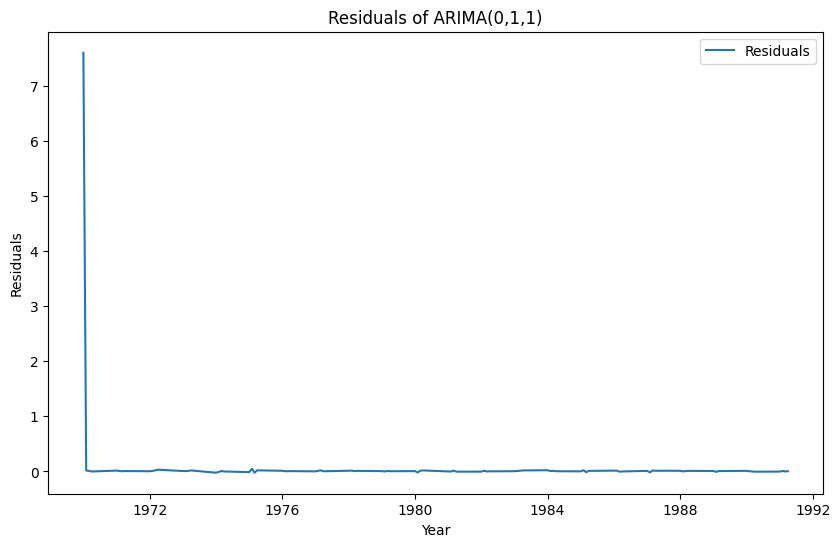

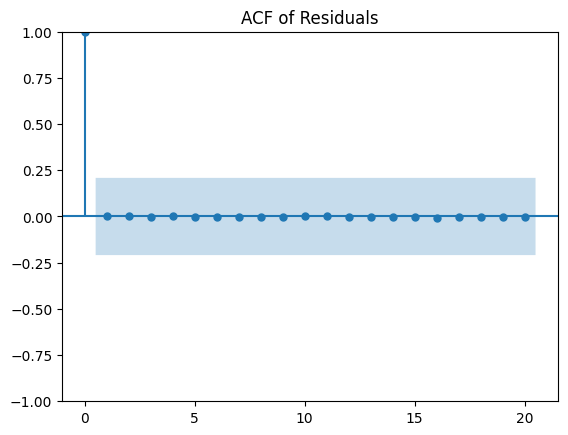

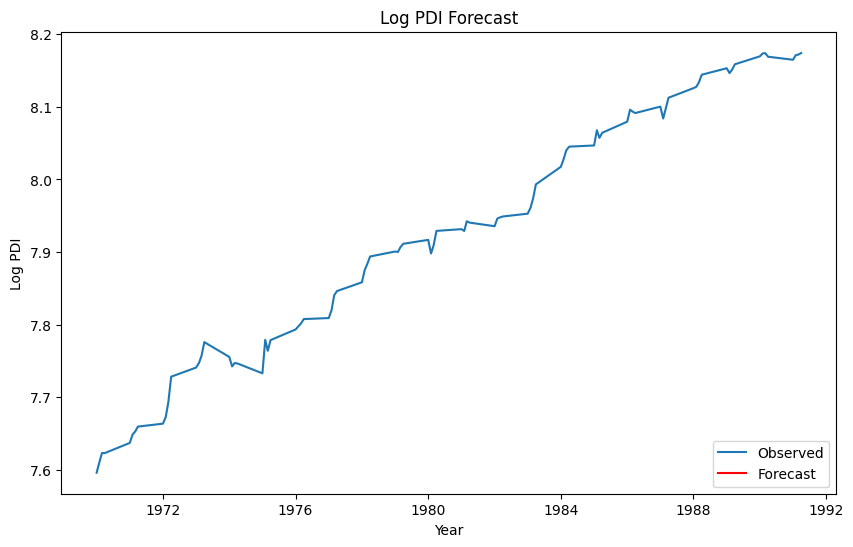

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

# Step 1: Data Preparation
# Corrected PDI data from the updated table
data = {
    'YEAR': [f"{year}.{quarter}" for year in range(1970, 1992) for quarter in range(1, 5)],
    'PDI': [
        1990.6, 2020.1, 2045.3, 2045.2, 2073.9, 2098.0, 2106.6, 2121.1, 2129.7, 2149.1, 2193.9, 2272.0,
        2300.7, 2315.2, 2337.9, 2382.7, 2334.7, 2304.5, 2315.0, 2313.7, 2282.5, 2390.3, 2354.4, 2389.4,
        2424.5, 2434.9, 2444.7, 2459.5, 2463.0, 2490.3, 2541.0, 2556.2, 2587.3, 2631.9, 2653.2, 2680.9,
        2699.2, 2697.6, 2715.3, 2728.1, 2742.9, 2692.0, 2722.5, 2777.0, 2783.7, 2776.7, 2814.1, 2808.8,
        2795.0, 2824.8, 2829.0, 2832.6, 2843.6, 2867.0, 2903.0, 2960.6, 3033.2, 3065.9, 3102.7, 3118.5,
        3123.6, 3189.6, 3156.5, 3178.7, 3227.5, 3281.4, 3272.6, 3266.2, 3295.2, 3241.7, 3285.7, 3335.8,
        3380.1, 3386.3, 3407.5, 3443.1, 3473.9, 3450.9, 3466.9, 3493.0, 3531.4, 3545.3, 3547.0, 3529.5,
        3514.8, 3537.4, 3539.9, 3547.5
    ]
}

df = pd.DataFrame(data)
df['YEAR'] = pd.to_datetime(df['YEAR'].str.replace('.', '-'), format='%Y-%m')
df.set_index('YEAR', inplace=True)
df['log_PDI'] = np.log(df['PDI'])

# Step 2: Exploratory Analysis
plt.figure(figsize=(10, 6))
plt.plot(df['log_PDI'], label='Log PDI')
plt.title('Log PDI Time Series')
plt.xlabel('Year')
plt.ylabel('Log PDI')
plt.legend()
plt.show()

# ADF Test for stationarity
def adf_test(series, title=''):
    result = adfuller(series.dropna())
    print(f'ADF Test on {title}')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')
    print('Stationary' if result[1] < 0.05 else 'Non-Stationary')

adf_test(df['log_PDI'], 'Log PDI')

# Step 3: Stationarity Adjustment (Differencing)
df['log_PDI_diff'] = df['log_PDI'].diff().dropna()
plt.figure(figsize=(10, 6))
plt.plot(df['log_PDI_diff'], label='First Difference of Log PDI')
plt.title('First Difference of Log PDI')
plt.xlabel('Year')
plt.ylabel('First Difference')
plt.legend()
plt.show()

adf_test(df['log_PDI_diff'], 'First Difference of Log PDI')

# Step 4: Model Identification (ACF and PACF)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['log_PDI_diff'].dropna(), ax=plt.gca(), lags=20)
plt.title('ACF of Differenced Log PDI')
plt.subplot(122)
plot_pacf(df['log_PDI_diff'].dropna(), ax=plt.gca(), lags=20)
plt.title('PACF of Differenced Log PDI')
plt.show()

# Step 5: Model Estimation
# Trying ARIMA(0,1,1) based on previous feedback (simpler model)
model = ARIMA(df['log_PDI'], order=(0, 1, 1))
results = model.fit()
print(results.summary())

# Step 6: Model Diagnostics
residuals = results.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals of ARIMA(0,1,1)')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.legend()
plt.show()

plot_acf(residuals, lags=20)
plt.title('ACF of Residuals')
plt.show()

# Step 7: Model Selection (AIC/BIC already in summary)
# Optionally fit other models (e.g., ARIMA(1,1,1), ARIMA(1,1,0)) and compare AIC/BIC

# Step 8: Forecasting
forecast = results.forecast(steps=8)
plt.figure(figsize=(10, 6))
plt.plot(df['log_PDI'], label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Log PDI Forecast')
plt.xlabel('Year')
plt.ylabel('Log PDI')
plt.legend()
plt.show()

In [3]:
print(forecast)

88    8.174418
89    8.174418
90    8.174418
91    8.174418
92    8.174418
93    8.174418
94    8.174418
95    8.174418
Name: predicted_mean, dtype: float64


ADF Test on First Difference of Log PDI
ADF Statistic: -4.66915965544451
p-value: 9.612498486181354e-05
Critical Values: {'1%': -3.512738056978279, '5%': -2.8974898650628984, '10%': -2.585948732897085}
Stationary


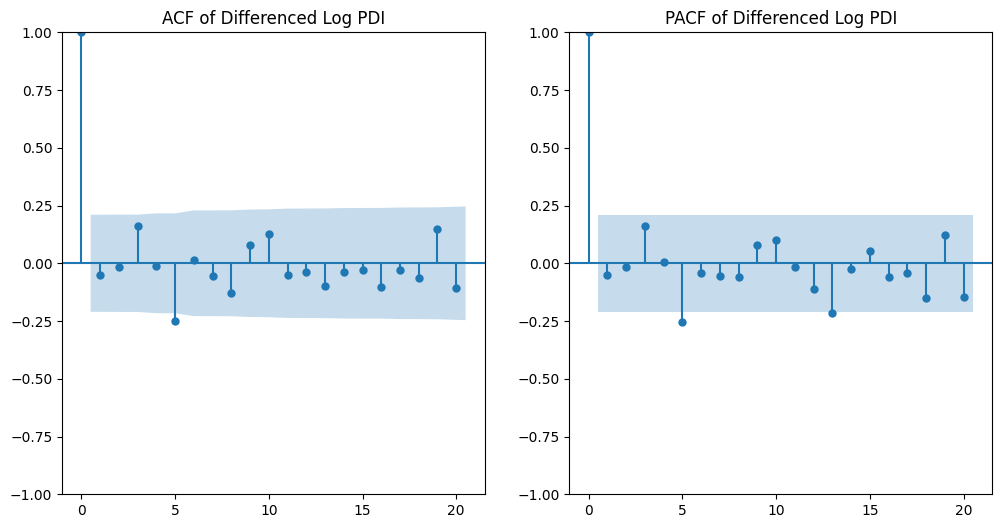

                               SARIMAX Results                                
Dep. Variable:                log_PDI   No. Observations:                   88
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 260.916
Date:                Fri, 14 Mar 2025   AIC                           -517.832
Time:                        18:05:37   BIC                           -512.900
Sample:                             0   HQIC                          -515.846
                                 - 88                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2430      0.083      2.924      0.003       0.080       0.406
sigma2         0.0001   1.66e-05      8.766      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   6.59   Jarque-

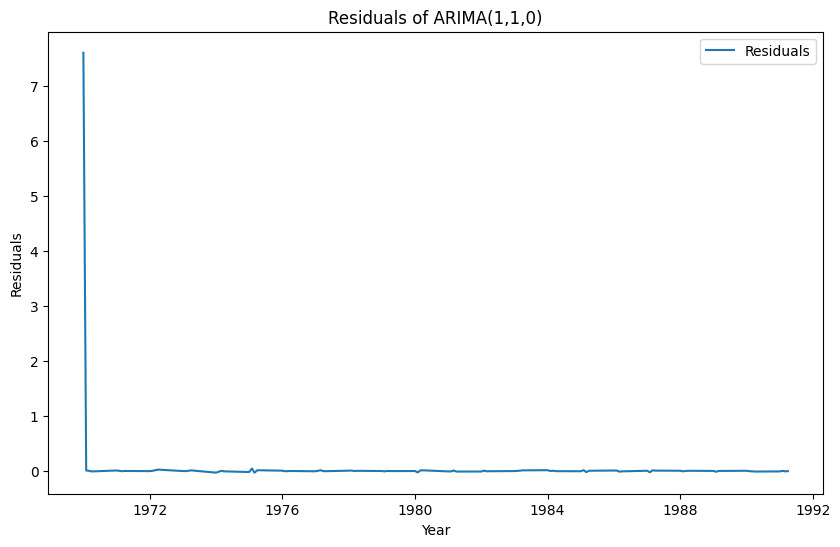

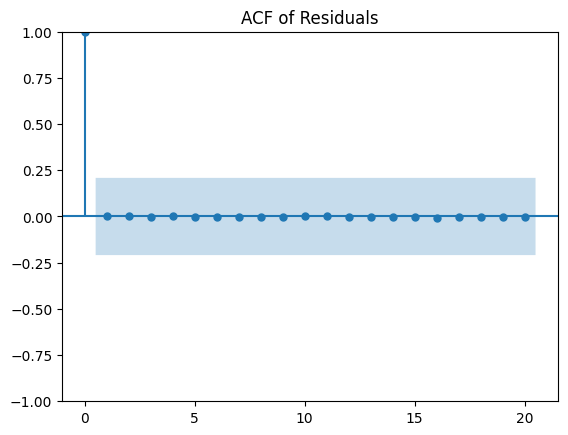

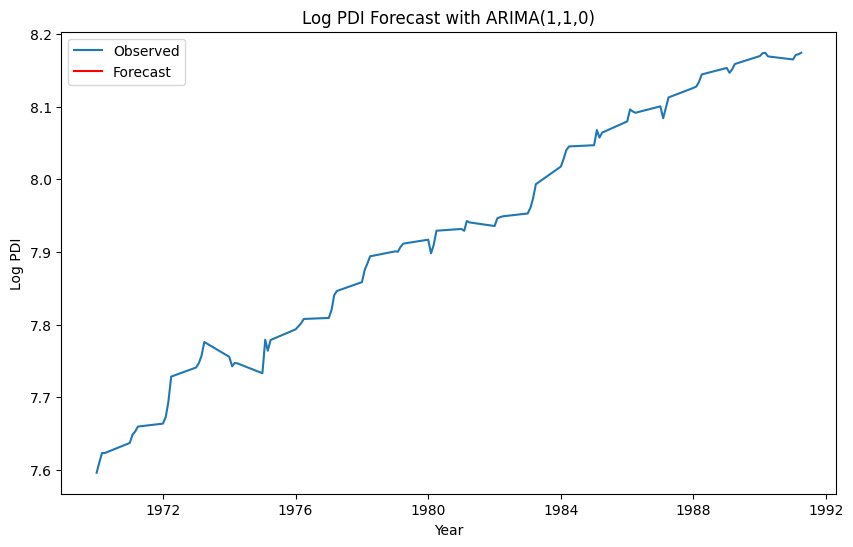

Forecast Values:
1991-07-01   NaN
1991-10-01   NaN
1992-01-01   NaN
1992-04-01   NaN
1992-07-01   NaN
1992-10-01   NaN
1993-01-01   NaN
1993-04-01   NaN
Freq: QS-JAN, Name: predicted_mean, dtype: float64


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

# Step 1: Data Preparation
data = {
    'YEAR': [f"{year}.{quarter}" for year in range(1970, 1992) for quarter in range(1, 5)],
    'PDI': [
        1990.6, 2020.1, 2045.3, 2045.2, 2073.9, 2098.0, 2106.6, 2121.1, 2129.7, 2149.1, 2193.9, 2272.0,
        2300.7, 2315.2, 2337.9, 2382.7, 2334.7, 2304.5, 2315.0, 2313.7, 2282.5, 2390.3, 2354.4, 2389.4,
        2424.5, 2434.9, 2444.7, 2459.5, 2463.0, 2490.3, 2541.0, 2556.2, 2587.3, 2631.9, 2653.2, 2680.9,
        2699.2, 2697.6, 2715.3, 2728.1, 2742.9, 2692.0, 2722.5, 2777.0, 2783.7, 2776.7, 2814.1, 2808.8,
        2795.0, 2824.8, 2829.0, 2832.6, 2843.6, 2867.0, 2903.0, 2960.6, 3033.2, 3065.9, 3102.7, 3118.5,
        3123.6, 3189.6, 3156.5, 3178.7, 3227.5, 3281.4, 3272.6, 3266.2, 3295.2, 3241.7, 3285.7, 3335.8,
        3380.1, 3386.3, 3407.5, 3443.1, 3473.9, 3450.9, 3466.9, 3493.0, 3531.4, 3545.3, 3547.0, 3529.5,
        3514.8, 3537.4, 3539.9, 3547.5
    ]
}

df = pd.DataFrame(data)
df['YEAR'] = pd.to_datetime(df['YEAR'].str.replace('.', '-'), format='%Y-%m')
df.set_index('YEAR', inplace=True)
df['log_PDI'] = np.log(df['PDI'])

# Step 2: Exploratory Analysis and Stationarity
df['log_PDI_diff'] = df['log_PDI'].diff().dropna()
adf_test = adfuller(df['log_PDI_diff'].dropna())
print('ADF Test on First Difference of Log PDI')
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')
print(f'Critical Values: {adf_test[4]}')
print('Stationary' if adf_test[1] < 0.05 else 'Non-Stationary')

# Step 3: Model Identification (ACF and PACF)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['log_PDI_diff'].dropna(), ax=plt.gca(), lags=20)
plt.title('ACF of Differenced Log PDI')
plt.subplot(122)
plot_pacf(df['log_PDI_diff'].dropna(), ax=plt.gca(), lags=20)
plt.title('PACF of Differenced Log PDI')
plt.show()

# Step 4: Model Estimation with ARIMA(1,1,0)
model = ARIMA(df['log_PDI'], order=(1, 1, 0))  # AR(1) on differenced series
results = model.fit()
print(results.summary())

# Step 5: Model Diagnostics
residuals = results.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals of ARIMA(1,1,0)')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.legend()
plt.show()

plot_acf(residuals, lags=20)
plt.title('ACF of Residuals')
plt.show()

# Step 6: Forecasting
forecast = results.forecast(steps=8)
forecast_index = pd.date_range(start=df.index[-1], periods=9, freq='QS')[1:]
forecast_series = pd.Series(forecast, index=forecast_index)

plt.figure(figsize=(10, 6))
plt.plot(df['log_PDI'], label='Observed')
plt.plot(forecast_series, label='Forecast', color='red')
plt.title('Log PDI Forecast with ARIMA(1,1,0)')
plt.xlabel('Year')
plt.ylabel('Log PDI')
plt.legend()
plt.show()

print('Forecast Values:')
print(forecast_series)

ADF Test on First Difference of Log PDI
ADF Statistic: -4.66915965544451
p-value: 9.612498486181354e-05
Critical Values: {'1%': -3.512738056978279, '5%': -2.8974898650628984, '10%': -2.585948732897085}
Stationary


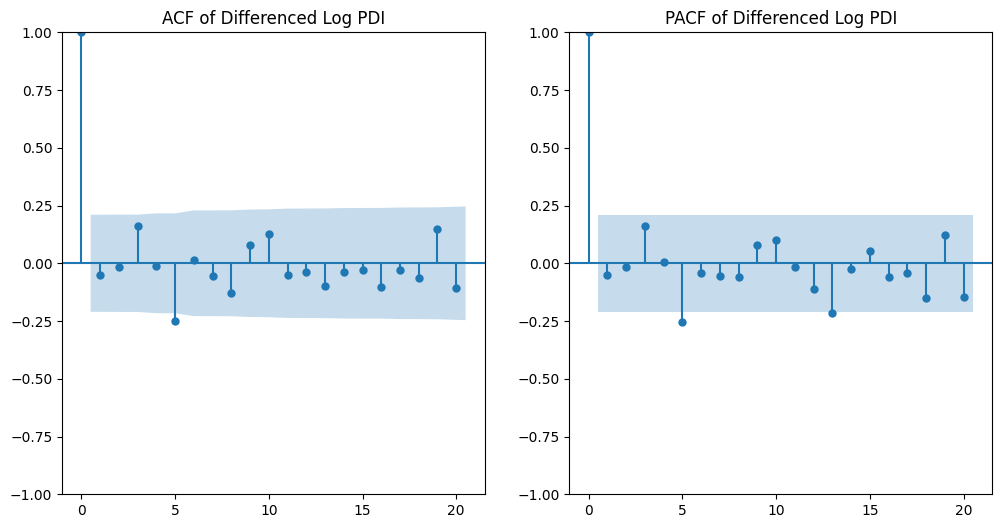

                               SARIMAX Results                                
Dep. Variable:                log_PDI   No. Observations:                   88
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 260.916
Date:                Fri, 14 Mar 2025   AIC                           -517.832
Time:                        18:08:05   BIC                           -512.900
Sample:                             0   HQIC                          -515.846
                                 - 88                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2430      0.083      2.924      0.003       0.080       0.406
sigma2         0.0001   1.66e-05      8.766      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   6.59   Jarque-

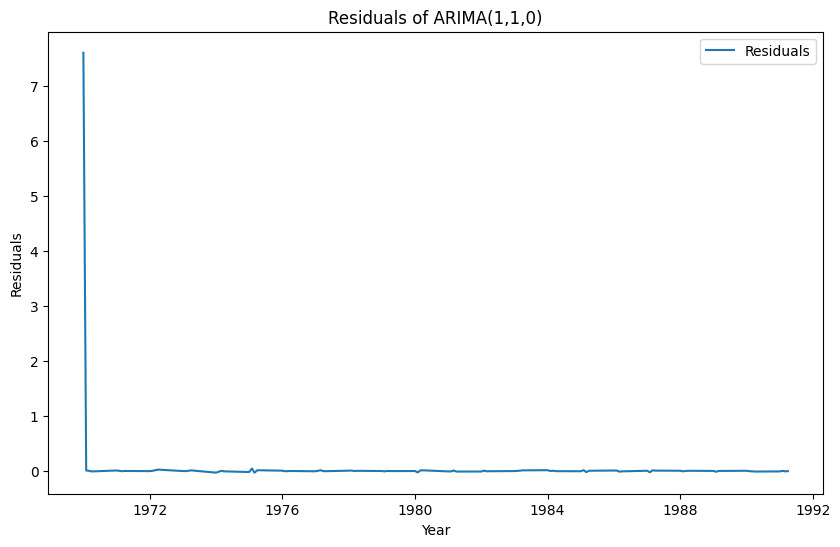

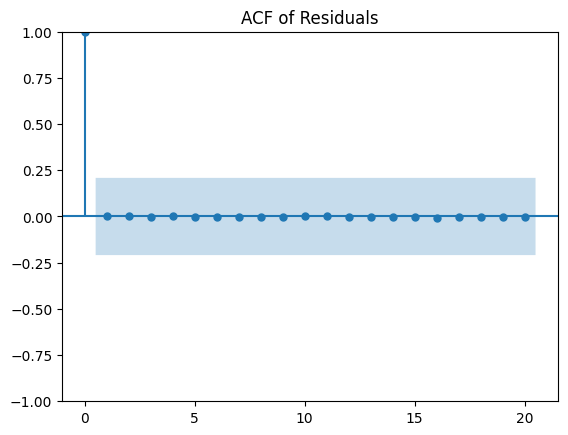

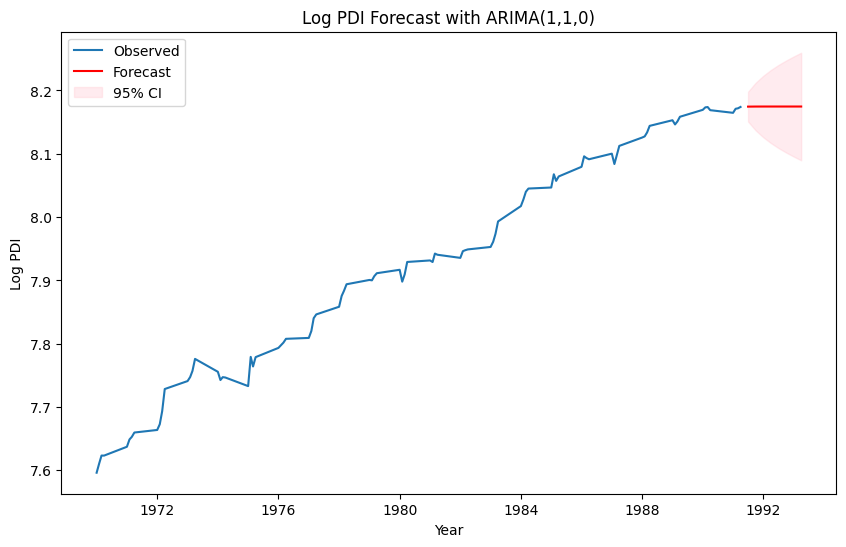

Forecast Values:
1991-07-01    8.174520
1991-10-01    8.174646
1992-01-01    8.174677
1992-04-01    8.174685
1992-07-01    8.174686
1992-10-01    8.174687
1993-01-01    8.174687
1993-04-01    8.174687
Freq: QS-JAN, dtype: float64


In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

# Step 1: Data Preparation
data = {
    'YEAR': [f"{year}.{quarter}" for year in range(1970, 1992) for quarter in range(1, 5)],
    'PDI': [
        1990.6, 2020.1, 2045.3, 2045.2, 2073.9, 2098.0, 2106.6, 2121.1, 2129.7, 2149.1, 2193.9, 2272.0,
        2300.7, 2315.2, 2337.9, 2382.7, 2334.7, 2304.5, 2315.0, 2313.7, 2282.5, 2390.3, 2354.4, 2389.4,
        2424.5, 2434.9, 2444.7, 2459.5, 2463.0, 2490.3, 2541.0, 2556.2, 2587.3, 2631.9, 2653.2, 2680.9,
        2699.2, 2697.6, 2715.3, 2728.1, 2742.9, 2692.0, 2722.5, 2777.0, 2783.7, 2776.7, 2814.1, 2808.8,
        2795.0, 2824.8, 2829.0, 2832.6, 2843.6, 2867.0, 2903.0, 2960.6, 3033.2, 3065.9, 3102.7, 3118.5,
        3123.6, 3189.6, 3156.5, 3178.7, 3227.5, 3281.4, 3272.6, 3266.2, 3295.2, 3241.7, 3285.7, 3335.8,
        3380.1, 3386.3, 3407.5, 3443.1, 3473.9, 3450.9, 3466.9, 3493.0, 3531.4, 3545.3, 3547.0, 3529.5,
        3514.8, 3537.4, 3539.9, 3547.5
    ]
}

df = pd.DataFrame(data)
df['YEAR'] = pd.to_datetime(df['YEAR'].str.replace('.', '-'), format='%Y-%m')
df.set_index('YEAR', inplace=True)
df['log_PDI'] = np.log(df['PDI'])

# Step 2: Exploratory Analysis and Stationarity
df['log_PDI_diff'] = df['log_PDI'].diff().dropna()
adf_test = adfuller(df['log_PDI_diff'].dropna())
print('ADF Test on First Difference of Log PDI')
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')
print(f'Critical Values: {adf_test[4]}')
print('Stationary' if adf_test[1] < 0.05 else 'Non-Stationary')

# Step 3: Model Identification (ACF and PACF)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['log_PDI_diff'].dropna(), ax=plt.gca(), lags=20)
plt.title('ACF of Differenced Log PDI')
plt.subplot(122)
plot_pacf(df['log_PDI_diff'].dropna(), ax=plt.gca(), lags=20)
plt.title('PACF of Differenced Log PDI')
plt.show()

# Step 4: Model Estimation with ARIMA(1,1,0)
model = ARIMA(df['log_PDI'], order=(1, 1, 0))
results = model.fit()
print(results.summary())

# Step 5: Model Diagnostics
residuals = results.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals of ARIMA(1,1,0)')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.legend()
plt.show()

plot_acf(residuals, lags=20)
plt.title('ACF of Residuals')
plt.show()

# Step 6: Forecasting
# Generate forecast
forecast_obj = results.get_forecast(steps=8)
forecast = forecast_obj.predicted_mean
forecast_ci = forecast_obj.conf_int()

# Create index for forecast period (1991.4 to 1993.3)
forecast_index = pd.date_range(start=df.index[-1] + pd.offsets.QuarterBegin(1), periods=8, freq='QS')

# Create forecast Series with proper index
forecast_series = pd.Series(forecast.values, index=forecast_index)

# Plot observed data and forecast
plt.figure(figsize=(10, 6))
plt.plot(df['log_PDI'], label='Observed')
plt.plot(forecast_series, label='Forecast', color='red')
plt.fill_between(forecast_series.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='95% CI')
plt.title('Log PDI Forecast with ARIMA(1,1,0)')
plt.xlabel('Year')
plt.ylabel('Log PDI')
plt.legend()
plt.show()

print('Forecast Values:')
print(forecast_series)

ADF Test on First Difference of Log PDI
ADF Statistic: -4.66915965544451
p-value: 9.612498486181354e-05
Critical Values: {'1%': -3.512738056978279, '5%': -2.8974898650628984, '10%': -2.585948732897085}
Stationary
                               SARIMAX Results                                
Dep. Variable:                log_PDI   No. Observations:                   88
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 270.603
Date:                Fri, 14 Mar 2025   AIC                           -535.206
Time:                        18:11:18   BIC                           -527.808
Sample:                             0   HQIC                          -532.227
                                 - 88                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

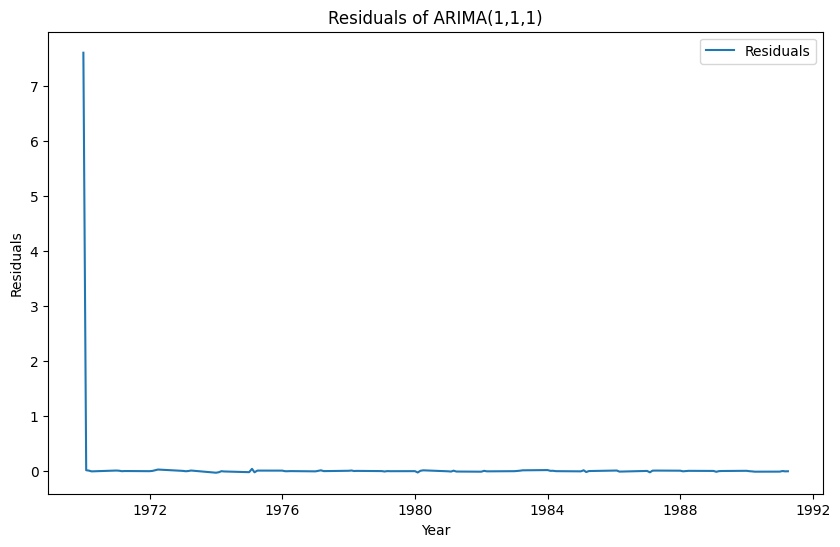

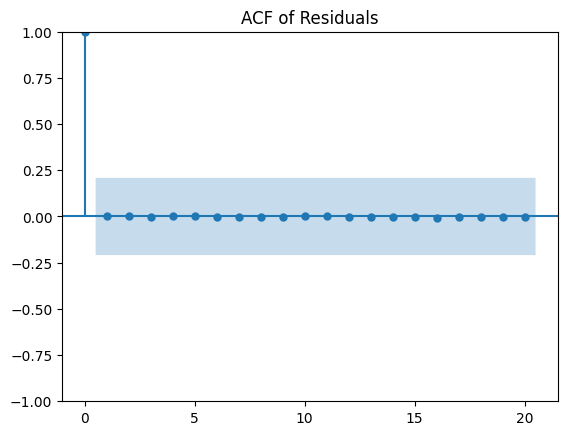

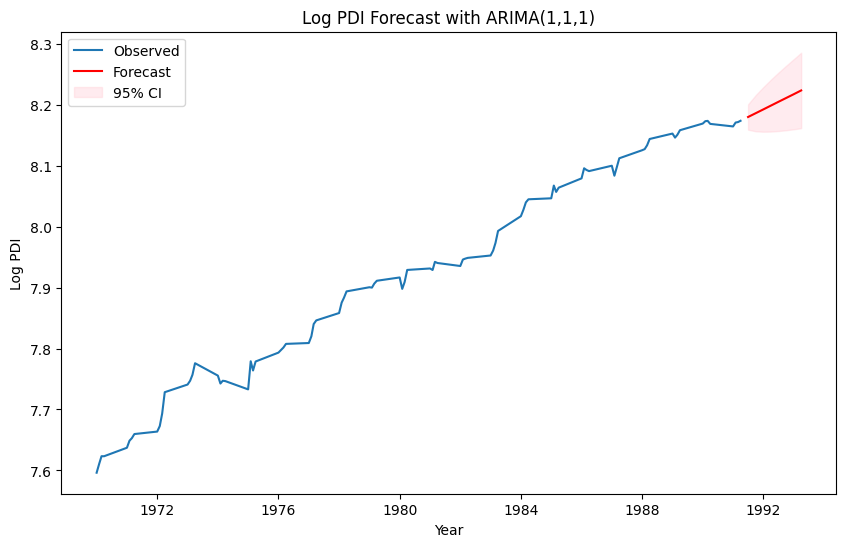

Forecast Values:
1991-07-01    8.180231
1991-10-01    8.186463
1992-01-01    8.192694
1992-04-01    8.198924
1992-07-01    8.205152
1992-10-01    8.211380
1993-01-01    8.217607
1993-04-01    8.223832
Freq: QS-JAN, dtype: float64


In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

# Step 1: Data Preparation
data = {
    'YEAR': [f"{year}.{quarter}" for year in range(1970, 1992) for quarter in range(1, 5)],
    'PDI': [
        1990.6, 2020.1, 2045.3, 2045.2, 2073.9, 2098.0, 2106.6, 2121.1, 2129.7, 2149.1, 2193.9, 2272.0,
        2300.7, 2315.2, 2337.9, 2382.7, 2334.7, 2304.5, 2315.0, 2313.7, 2282.5, 2390.3, 2354.4, 2389.4,
        2424.5, 2434.9, 2444.7, 2459.5, 2463.0, 2490.3, 2541.0, 2556.2, 2587.3, 2631.9, 2653.2, 2680.9,
        2699.2, 2697.6, 2715.3, 2728.1, 2742.9, 2692.0, 2722.5, 2777.0, 2783.7, 2776.7, 2814.1, 2808.8,
        2795.0, 2824.8, 2829.0, 2832.6, 2843.6, 2867.0, 2903.0, 2960.6, 3033.2, 3065.9, 3102.7, 3118.5,
        3123.6, 3189.6, 3156.5, 3178.7, 3227.5, 3281.4, 3272.6, 3266.2, 3295.2, 3241.7, 3285.7, 3335.8,
        3380.1, 3386.3, 3407.5, 3443.1, 3473.9, 3450.9, 3466.9, 3493.0, 3531.4, 3545.3, 3547.0, 3529.5,
        3514.8, 3537.4, 3539.9, 3547.5
    ]
}

df = pd.DataFrame(data)
df['YEAR'] = pd.to_datetime(df['YEAR'].str.replace('.', '-'), format='%Y-%m')
df.set_index('YEAR', inplace=True)
df['log_PDI'] = np.log(df['PDI'])

# Step 2: Exploratory Analysis and Stationarity
df['log_PDI_diff'] = df['log_PDI'].diff().dropna()
adf_test = adfuller(df['log_PDI_diff'].dropna())
print('ADF Test on First Difference of Log PDI')
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')
print(f'Critical Values: {adf_test[4]}')
print('Stationary' if adf_test[1] < 0.05 else 'Non-Stationary')

# Step 3: Model Estimation with ARIMA(1,1,1)
model = ARIMA(df['log_PDI'], order=(1, 1, 1), enforce_stationarity=True)
results = model.fit()
print(results.summary())

# Step 4: Model Diagnostics
residuals = results.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals of ARIMA(1,1,1)')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.legend()
plt.show()

plot_acf(residuals, lags=20)
plt.title('ACF of Residuals')
plt.show()

# Step 5: Forecasting
forecast_obj = results.get_forecast(steps=8)
forecast = forecast_obj.predicted_mean
forecast_ci = forecast_obj.conf_int()

forecast_index = pd.date_range(start=df.index[-1] + pd.offsets.QuarterBegin(1), periods=8, freq='QS')
forecast_series = pd.Series(forecast.values, index=forecast_index)

plt.figure(figsize=(10, 6))
plt.plot(df['log_PDI'], label='Observed')
plt.plot(forecast_series, label='Forecast', color='red')
plt.fill_between(forecast_series.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='95% CI')
plt.title('Log PDI Forecast with ARIMA(1,1,1)')
plt.xlabel('Year')
plt.ylabel('Log PDI')
plt.legend()
plt.show()

print('Forecast Values:')
print(forecast_series)

In [8]:
from google.colab import drive
import os

# 1. Montar Google Drive
drive.mount('/content/drive')

# 2. Definir la ruta del archivo
input_path = "/content/drive/My Drive/6to semestre: feb-jun 2025/series de tiempo/examen 1.ipynb"
output_path = "/content/drive/My Drive/6to semestre: feb-jun 2025/series de tiempo/examen 1.html"

# 3. Convertir a HTML usando nbconvert
!jupyter nbconvert --to html "$input_path" --output "$output_path"

print(f"Archivo convertido y guardado en: {output_path}")

Mounted at /content/drive
[NbConvertApp] Converting notebook /content/drive/My Drive/6to semestre: feb-jun 2025/series de tiempo/examen 1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 17 image(s).
[NbConvertApp] Writing 961259 bytes to /content/drive/My Drive/6to semestre: feb-jun 2025/series de tiempo/examen 1.html
Archivo convertido y guardado en: /content/drive/My Drive/6to semestre: feb-jun 2025/series de tiempo/examen 1.html
